# Base Model

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

# model_json = model.to_json()
# json_file = open("model_CNN.json", "w")
# json_file.write(model_json)
# json_file.close()
# model.save_weights("model_CNN.h5")
# print("Model saved to disk")
# os.getcwd()

Epoch 1/5
1563/1563 [==============================] - 39s 4ms/step - loss: 1.7524 - accuracy: 0.3584
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2658 - accuracy: 0.5514
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1146 - accuracy: 0.6054
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0136 - accuracy: 0.6394
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9487 - accuracy: 0.6662


In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9022 - accuracy: 0.6868


[0.9022221565246582, 0.6868000030517578]

In [6]:
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                activation='relu',
                                input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels,
            batch_size=64,
            validation_data = (train_data_val, train_labels_val),
            epochs=50,
            verbose=2)

Epoch 1/50
625/625 - 4s - loss: 1.6376 - accuracy: 0.4070 - val_loss: 1.2364 - val_accuracy: 0.5701
Epoch 2/50
625/625 - 3s - loss: 1.2702 - accuracy: 0.5454 - val_loss: 1.0592 - val_accuracy: 0.6344
Epoch 3/50
625/625 - 3s - loss: 1.1284 - accuracy: 0.6021 - val_loss: 0.9891 - val_accuracy: 0.6522
Epoch 4/50
625/625 - 3s - loss: 1.0304 - accuracy: 0.6349 - val_loss: 0.9403 - val_accuracy: 0.6715
Epoch 5/50
625/625 - 3s - loss: 0.9511 - accuracy: 0.6639 - val_loss: 0.9187 - val_accuracy: 0.6765
Epoch 6/50
625/625 - 3s - loss: 0.8990 - accuracy: 0.6786 - val_loss: 0.8987 - val_accuracy: 0.6858
Epoch 7/50
625/625 - 3s - loss: 0.8391 - accuracy: 0.7008 - val_loss: 0.8872 - val_accuracy: 0.6880
Epoch 8/50
625/625 - 3s - loss: 0.7908 - accuracy: 0.7161 - val_loss: 0.9013 - val_accuracy: 0.6868
Epoch 9/50
625/625 - 3s - loss: 0.7470 - accuracy: 0.7313 - val_loss: 0.8882 - val_accuracy: 0.6962
Epoch 10/50
625/625 - 3s - loss: 0.6963 - accuracy: 0.7491 - val_loss: 0.9060 - val_accuracy: 0.6963

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2498 - accuracy: 0.7001


[1.2498180866241455, 0.7001000046730042]

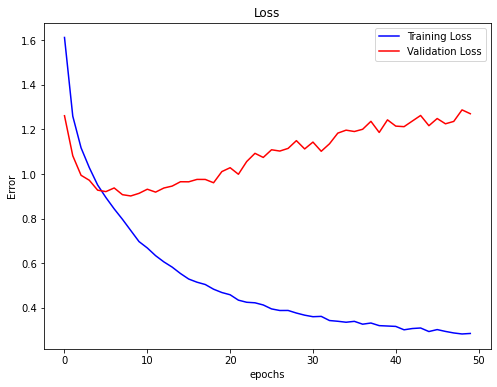

In [ ]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

In [7]:
from keras import backend as K
K.clear_session()

## Kfold Cross-Validation

In [8]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 5


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                  activation='relu',
                                  input_shape=(32, 32, 3)))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=10,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.9058991074562073; accuracy of 68.90000104904175%
Score for fold 2: loss of 0.9064392447471619; accuracy of 68.70999932289124%
Score for fold 3: loss of 0.8684099316596985; accuracy of 69.77999806404114%
Score for fold 4: loss of 0.877720296382904; accuracy of 69.31999921798706%
Score for fold 5: loss of 0.9150363206863403; accuracy of 68.95999908447266%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.9058991074562073 - Accuracy: 68.90000104904175%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.9064392447471619 - Accuracy: 68.70999932289124%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.8684099316596985 - Accuracy: 69.77999806404114%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.877720296382904 

# Modified Model

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

In [10]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 4
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(16,kernel_size=3,padding='same',activation='relu',
            input_shape=(32,32,3)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(32,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j>2:
        model[j].add(Conv2D(128,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    if j>3:
        model[j].add(Conv2D(256,kernel_size=3,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

    print(model[j].summary())

# DATA
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# TRAIN NETWORKS
history = [0] * nets
epochs = 10
names = ["(Conv2D+MaxPool)x1","(Conv2D+MaxPool)x2","(Conv2D+MaxPool)x3","(Conv2D+MaxPool)x4"]
print('------------------------ CNN NETWORKS ------------------------')
for j in range(nets):
    history[j] = model[j].fit(train_data,train_labels, batch_size=64, epochs = epochs,
        validation_data = (train_data_val, train_labels_val), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 1,051,850
Trainable params: 1,051,850
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_6"
_________________________________________________________________
Layer (type)     

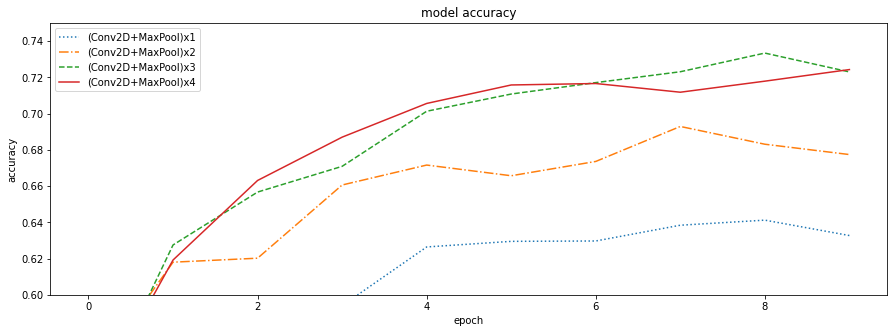

In [12]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.60,0.75])
plt.show()

In [13]:
from keras import backend as K
K.clear_session()

### Search for the number of filters

In [8]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=3,activation='relu',input_shape=(32,32,3)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(j*16+16,kernel_size=3,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(j*32+32,kernel_size=3,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer=Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    print(model[j].summary())

    
# DATA
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 10
print('------------------------ CNN NETWORKS ------------------------')
for j in range(nets):
    history[j] = model[j].fit(train_data,train_labels, batch_size=64, epochs = epochs,
        validation_data = (train_data_val, train_labels_val), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

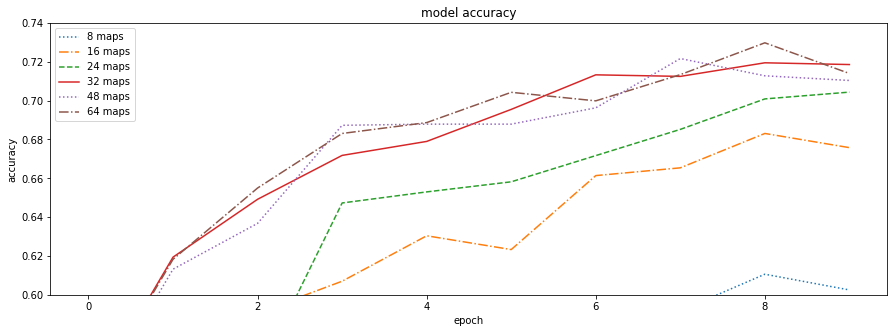

In [11]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.60,0.74])
plt.show()

### Search for the number of neurons after flatten

In [13]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(32,32,3)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(128,kernel_size=3,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer=Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# DATA
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 10
for j in range(nets):
    history[j] = model[j].fit(train_data,train_labels, batch_size=64, epochs = epochs,
        validation_data = (train_data_val, train_labels_val), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 0N: Epochs=10, Train accuracy=0.74918, Validation accuracy=0.68230
CNN 32N: Epochs=10, Train accuracy=0.75455, Validation accuracy=0.68680
CNN 64N: Epochs=10, Train accuracy=0.76243, Validation accuracy=0.68520
CNN 128N: Epochs=10, Train accuracy=0.78455, Validation accuracy=0.69460
CNN 256N: Epochs=10, Train accuracy=0.81685, Validation accuracy=0.70700
CNN 512N: Epochs=10, Train accuracy=0.83403, Validation accuracy=0.71580
CNN 1024N: Epochs=10, Train accuracy=0.86265, Validation accuracy=0.71290
CNN 2048N: Epochs=10, Train accuracy=0.89930, Validation accuracy=0.71810


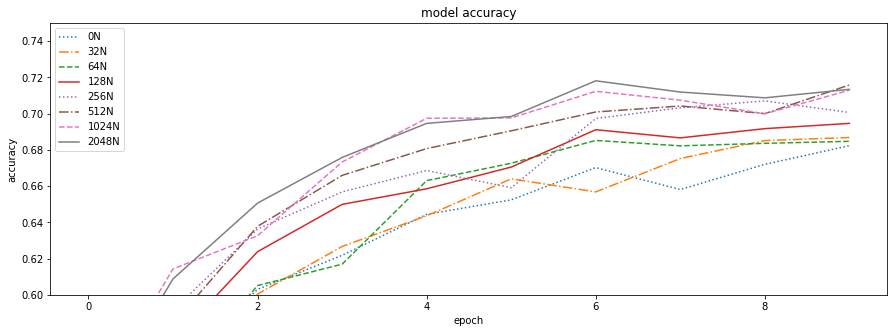

In [17]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.60,0.75])
plt.show()

### Search for the best dropout rate

In [5]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(32,32,3)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(128,kernel_size=3,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(512, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer=Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# DATA
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(train_data,train_labels, batch_size=64, epochs = epochs,
        validation_data = (train_data_val, train_labels_val), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN D=0: Epochs=30, Train accuracy=0.97473, Validation accuracy=0.72080
CNN D=0.1: Epochs=30, Train accuracy=0.91422, Validation accuracy=0.75340
CNN D=0.2: Epochs=30, Train accuracy=0.83630, Validation accuracy=0.75440
CNN D=0.3: Epochs=30, Train accuracy=0.77415, Validation accuracy=0.75900
CNN D=0.4: Epochs=30, Train accuracy=0.72535, Validation accuracy=0.74270
CNN D=0.5: Epochs=30, Train accuracy=0.65108, Validation accuracy=0.69520
CNN D=0.6: Epochs=30, Train accuracy=0.58790, Validation accuracy=0.62610
CNN D=0.7: Epochs=30, Train accuracy=0.50542, Validation accuracy=0.47550


### Overall Test Accuracy

In [3]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 5

fold_no = 1

train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                  activation='relu',
                                  input_shape=(32, 32, 3)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer=Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=30,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.7574379444122314; accuracy of 74.09999966621399%
Score for fold 2: loss of 0.7438628673553467; accuracy of 74.18000102043152%
Score for fold 3: loss of 0.7507834434509277; accuracy of 74.50000047683716%
Score for fold 4: loss of 0.7409762144088745; accuracy of 74.18000102043152%
Score for fold 5: loss of 0.720557689666748; accuracy of 75.3499984741211%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.7574379444122314 - Accuracy: 74.09999966621399%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.7438628673553467 - Accuracy: 74.18000102043152%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.7507834434509277 - Accuracy: 74.50000047683716%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.7409762144088745 